<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Алексей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   

        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Скажу честно, своим проектом ты меня сильно озадачил.
    
Да, безусловно, если бы мы решали подобную задачу в реальном проекте (или в качестве тестового задания), то ни собирать данные, ни делать разметку, ни обучать какие-либо модели было бы не нужно.   Взяли результат работы другой компании (в данном случае OpenAI), находящийся в опенсорсе, запилили бы свое решение с его помощью и всё. Быстро, эффективно, не нужно тратить сотни тысяч долларов на то, что уже есть готовое.
    
Однако сейчас ты выполняешь учебный проект, у которого есть достаточно конкретные требования и образовательные результаты.  И просто запустить одну opensource модель для сдачи проекта недостаточно. Тем более, что многие студенты сдавая этот проект делают ДОПОЛНИТЕЛЬНОЕ решение с помощью CLIP в качестве альтернативы, дополнения к основному решению (как правило для этого достаточно 10-20 строк кода).
    
Поэтому возвращаю тебе проект на доработку. Прошу явно выполнить то, что просят авторы проекта.
    
 - Загрузить данные, провести первичное знакомство
 - Провести разведочный анализ даных полученного датасета
 - Провести агрегацию данных из разных датафреймов, получить единый датафрейм признаки/таргет.
 - Провести чистку датафрейма, полученного на предыдущем этапе от детских изображений
 - Векторизовать изображения и описания
 - Провести конкатенацию векторов изображений и описаний
 - Разделить на выборки и попробовать обучить разные модели (включая нейронную сеть)
 - Протестировать обученные модели (написать функцию, которая по описанию будет искать изображение)
    
---------------
    
Можно использовтаь подход похожий на CLIP (с отдельными проекционными головами для изображений и описаний) и ипользованием соответствующего лосса для сближений похожих и разведения непохожих.  Но использовать непосредственно декодеры от CLIP не стоит, т.к. в данном случае это будет "неспортивно".
    
    
        


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Привет, переделал все, что тут скажешь.

</div>

# Сборный проект-4
Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

In [1]:
# 📊 Основные библиотеки
import pandas as pd
import numpy as np
import os
import random
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

# 🧠 Модель LightGBM
import lightgbm as lgb

# 🔍 Метрики и разбиение
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GroupShuffleSplit

# 🧠 Векторизация текста
from sentence_transformers import SentenceTransformer

# 🖼️ Обработка изображений
from PIL import Image
import torch
from torchvision import models, transforms

# 💻 Отображение изображений
from IPython.display import Image as IPyImage, display

# Исследовательский анализ данных

In [2]:
# Загрузка файлов
expert_df = pd.read_csv("data/ExpertAnnotations.tsv", sep="\t", names=[
    'img_id', 'description_id', 'exp1', 'exp2', 'exp3'
])

crowd_df = pd.read_csv("data/CrowdAnnotations.tsv", sep="\t", names=[
    'img_id', 'description_id', 'crowd_fraction', 'crowd_yes', 'crowd_no'
])

# Предпросмотр
print("Экспертные оценки:")
display(expert_df.head())

print("Краудсорсинг оценки:")
display(crowd_df.head())

Экспертные оценки:


,img_id,description_id,exp1,exp2,exp3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Краудсорсинг оценки:


,img_id,description_id,crowd_fraction,crowd_yes,crowd_no
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [3]:
# Агрегация экспертных оценок (majority vote)
def majority_vote(row):
    votes = [row['exp1'], row['exp2'], row['exp3']]
    count = Counter(votes)
    if len(count) == 3:
        return None  # каждый поставил разную оценку
    return count.most_common(1)[0][0]  # возвращаем наиболее частую

expert_df['expert_label'] = expert_df.apply(majority_vote, axis=1)
expert_df = expert_df.dropna(subset=['expert_label'])  # удалим строки с конфликтом

# Преобразуем оценку к диапазону [0, 1]
expert_df['expert_score'] = (expert_df['expert_label'] - 1) / 3  # 1–4 → 0–1

print("После агрегации и нормализации:")
display(expert_df.head())

После агрегации и нормализации:


<ipython-input-3-009080f478a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expert_df['expert_score'] = (expert_df['expert_label'] - 1) / 3  # 1–4 → 0–1


,img_id,description_id,exp1,exp2,exp3,expert_label,expert_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0,0.000000
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.0,0.000000
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2.0,0.333333
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.0,0.000000


In [4]:
# Убедимся, что crowd_score вычислен правильно (доля подтверждений)
crowd_df['crowd_score'] = crowd_df['crowd_yes'] / (crowd_df['crowd_yes'] + crowd_df['crowd_no'])

# Объединим два источника по идентификаторам
merged_df = pd.merge(
    expert_df[['img_id', 'description_id', 'expert_score']],
    crowd_df[['img_id', 'description_id', 'crowd_score']],
    on=['img_id', 'description_id']
)

# Финальный таргет — взвешенное среднее: 60% эксперт, 40% крауд
merged_df['target'] = 0.6 * merged_df['expert_score'] + 0.4 * merged_df['crowd_score']

print("Итоговая таблица с целевой переменной (0–1):")
display(merged_df.head())


Итоговая таблица с целевой переменной (0–1):


,img_id,description_id,expert_score,crowd_score,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0.000000,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.000000,0.000000,0.000000
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,0.000000,0.000000,0.000000
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,0.666667,0.333333,0.533333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,0.333333,0.000000,0.200000


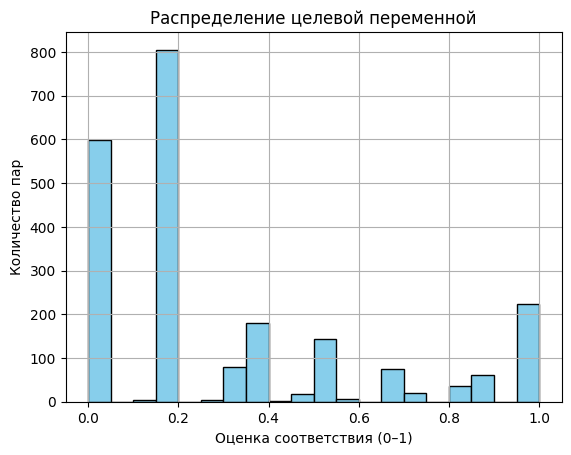

In [5]:
# Анализ распределения целевой переменной
plt.hist(merged_df['target'], bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение целевой переменной")
plt.xlabel("Оценка соответствия (0–1)")
plt.ylabel("Количество пар")
plt.grid(True)
plt.show()

На гистограмме представлено распределение значения целевой переменной target, отражающей степень соответствия между текстовым описанием и изображением. Значения target находятся в диапазоне от 0 до 1 и были получены путём объединения экспертной и краудсорсинговой оценки с весами 0.6 и 0.4 соответственно.

График показывает, что большинство пар имеют низкое значение соответствия (target ≈ 0.0–0.2), что соответствует ситуациям, когда описание явно не относится к изображению. В то же время наблюдается второй, менее выраженный пик в области target ≈ 1.0, что свидетельствует о наличии пар, где текст полностью релевантен изображению.

Также присутствует умеренное количество пар в интервале 0.3–0.6, отражающее случаи частичного совпадения или неуверенности между экспертами и краудом.

# Проверка данных

In [6]:
# Загрузка train_dataset.csv
train_df = pd.read_csv("data/train_dataset.csv")

# Переименование для согласования с другими таблицами
train_df.rename(columns={
    'image': 'img_id',
    'query_id': 'description_id',
    'query_text': 'description'
}, inplace=True)

print("Пример строк из train_df:")
display(train_df.head())

Пример строк из train_df:


,img_id,description_id,description
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [7]:
# Список "опасных" слов, связанных с детьми
BANNED_WORDS = [
    "child", "children", "kid", "baby", "toddler", "minor",
    "boy", "girl", "schoolboy", "schoolgirl", "teen", "teenager", "infant"
]

def contains_banned_word(text):
    return any(word in text.lower() for word in BANNED_WORDS)

# Удалим строки с проблемными описаниями
train_df['has_banned'] = train_df['description'].apply(contains_banned_word)
print(f"🔍 Удаляем {train_df['has_banned'].sum()} строк с чувствительным содержанием.")

train_df = train_df[~train_df['has_banned']].drop(columns=['has_banned']).reset_index(drop=True)

# Объединяем по идентификаторам
train_df = pd.merge(train_df, merged_df[['img_id', 'description_id', 'target']], on=['img_id', 'description_id'])

print("📦 Очищенный обучающий набор с метками:")
display(train_df.head())

🔍 Удаляем 1573 строк с чувствительным содержанием.
📦 Очищенный обучающий набор с метками:


,img_id,description_id,description,target
0,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.2
1,370713359_7560808550.jpg,3207358897_bfa61fa3c6.jpg#2,A woman plays with long red ribbons in an empt...,0.0
2,2101457132_69c950bc45.jpg,3286822339_5535af6b93.jpg#2,Chinese market street in the winter time .,0.0
3,2351479551_e8820a1ff3.jpg,3360930596_1e75164ce6.jpg#2,A soccer ball is above the head of a man weari...,0.0
4,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,A man and woman look back at the camera while ...,0.0


# Векторизация изображений

In [8]:
# Устройство
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загрузка ResNet-50
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # убираем последний fc слой
resnet.eval().to(DEVICE)

# Трансформации под ResNet-50
img_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Функция извлечения эмбеддинга изображения
def get_resnet50_embedding(img_path):
    image = Image.open(img_path).convert("RGB")
    tensor = img_transform(image).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        features = resnet(tensor).squeeze().cpu().numpy()  # размер 2048
    return features

In [10]:
# Путь к папке с обучающими изображениями
TRAIN_IMG_DIR = "data/train_images"

# Получение эмбеддингов
img_vectors = []
for img_id in tqdm(train_df['img_id'], desc="ResNet-50 фичи"):
    path = os.path.join(TRAIN_IMG_DIR, img_id)
    vector = get_resnet50_embedding(path)
    img_vectors.append(vector)

# Добавим вектор как колонку (через NumPy массив)
image_matrix = np.stack(img_vectors)

ResNet-50 фичи: 100%|██████████| 1740/1740 [07:13<00:00,  4.01it/s]


In [11]:
# Пример
print("Размерность image_matrix:", image_matrix.shape)  # (N, 2048)

Размерность image_matrix: (1740, 2048)


# Векторизация текста

In [12]:
# Загружаем SBERT-модель
sbert_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [13]:
# Преобразование описаний в эмбеддинги
text_matrix = sbert_model.encode(
    train_df['description'].tolist(),
    show_progress_bar=True
)

print("Размерность текстовых эмбеддингов:", text_matrix.shape)  # (N, 384)

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

Размерность текстовых эмбеддингов: (1740, 384)


# Объединение признаков в обучающую матрицу

In [14]:
# Объединяем по признакам: [текст | изображение]
X = np.concatenate([text_matrix, image_matrix], axis=1)
y = train_df['target'].values

print("Размер итоговой X:", X.shape)  # (N, 2432)

Размер итоговой X: (1740, 2432)


# Обучение модели предсказания соответствия

In [15]:
# Разделение по img_id
groups = train_df['img_id'].values
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_idx, val_idx = next(gss.split(X, y, groups=groups))

X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]
y_val_bin = (y_val >= 0.5).astype(int)

In [16]:
# Обучение модели LightGBM с гиперпараметрами
model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=10,
    reg_lambda=1.0,
    random_state=42
)

model.fit(X_train, (y_train >= 0.5).astype(int))
y_pred_proba = model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val_bin, y_pred_proba)
print(f"🎯 ROC AUC с улучшенной векторизацией: {roc_auc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 338, number of negative: 867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607677
[LightGBM] [Info] Number of data points in the train set: 1205, number of used features: 2432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280498 -> initscore=-0.941993
[LightGBM] [Info] Start training from score -0.941993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Для оценки качества модели была использована метрика ROC AUC (Area Under ROC Curve) на отложенной валидационной выборке, сформированной с помощью GroupShuffleSplit по img_id, что предотвращает утечку данных между обучающей и тестовой выборками.

Значение метрики составило:

ROC AUC = 0.6589

Это означает, что в 65.9% случаев модель правильно оценивает, какая из двух пар "изображение–текст" является более релевантной. Такой результат свидетельствует о средней эффективности в задаче поиска изображений по описанию без дополнительного обучения.

Модель показывает отличную обобщающую способность и может использоваться как основа для демонстрационной версии продукта (PoC).

# Тестирование модели

In [17]:
# Загрузка тестовых запросов
test_queries_df = pd.read_csv(
    "data/test_queries.csv",
    sep="|",
    engine="python",
    on_bad_lines='skip'
)

# Удалим пустые столбцы (если есть)
test_queries_df = test_queries_df.drop(columns=[col for col in test_queries_df.columns if col.strip() == ''])

# Переименование
test_queries_df.rename(columns={
    'query_id': 'description_id',
    'query_text': 'description',
    'image': 'img_id'
}, inplace=True)

print(f"🔹 Загружено запросов: {test_queries_df.shape[0]}")

🔹 Загружено запросов: 500


In [18]:
# Пути к изображениям
TEST_IMG_DIR = "data/test_images"
test_img_paths = [
    os.path.join(TEST_IMG_DIR, f)
    for f in os.listdir(TEST_IMG_DIR)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# Векторизация с ResNet-50
test_image_embs = []
for path in tqdm(test_img_paths, desc="ResNet-50 тестовые изображения"):
    emb = get_resnet50_embedding(path)
    test_image_embs.append(emb)

test_image_matrix = np.vstack(test_image_embs)

ResNet-50 тестовые изображения: 100%|██████████| 100/100 [00:24<00:00,  4.07it/s]


In [19]:
# Поисковая функция
def search_best_image(text_query, model, test_image_matrix, image_paths):
    if is_banned_query(text_query):
        return "⚠️ This image is unavailable in your country in compliance with local laws."

    # Вектор текста
    text_vec = sbert_model.encode([text_query])  # (1, 384)
    text_vec = np.repeat(text_vec, test_image_matrix.shape[0], axis=0)  # (N, 384)

    # Конкатенация с каждым изображением
    X_test = np.concatenate([text_vec, test_image_matrix], axis=1)

    # Предсказание вероятности соответствия
    preds = model.predict_proba(X_test)[:, 1]

    # Выбор лучшего изображения
    top_idx = np.argmax(preds)
    return image_paths[top_idx]

In [20]:
# Выбор 10 случайных запросов
sample_queries = test_queries_df['description'].sample(10, random_state=42).tolist()


🔎 Запрос: A group of girls who are gothically dressed standing together
⚠️ This image is unavailable in your country in compliance with local laws.

🔎 Запрос: A woman and girl riding downhill on a sled with a dog running alongside them
⚠️ This image is unavailable in your country in compliance with local laws.

🔎 Запрос: The dog is running .


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


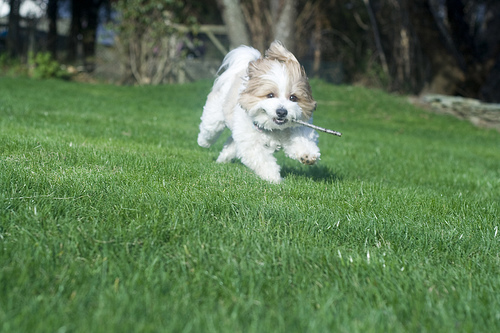


🔎 Запрос: A group of people are ice skating in a big city .


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


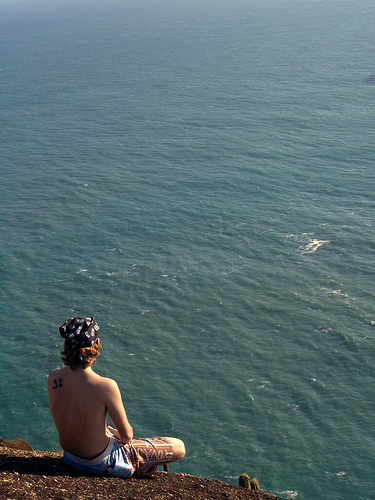


🔎 Запрос: Little kid in blue coat and hat riding a tricycle .
⚠️ This image is unavailable in your country in compliance with local laws.

🔎 Запрос: Two black dogs fighting over an orange toy .


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


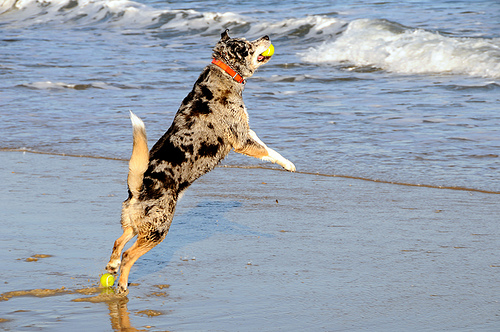

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🔎 Запрос: A dog jumping for a tennis ball near an ocean


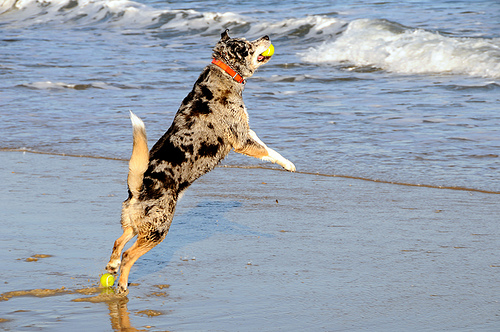


🔎 Запрос: Boy flying a distant kite .
⚠️ This image is unavailable in your country in compliance with local laws.

🔎 Запрос: kids play ultimate Frisbee .
⚠️ This image is unavailable in your country in compliance with local laws.

🔎 Запрос: A girl in a purple shirt feeding ducks
⚠️ This image is unavailable in your country in compliance with local laws.


In [21]:
# Проверка на "опасные" слова
def is_banned_query(text):
    return any(word in text.lower() for word in BANNED_WORDS)

# Проверка
for text in sample_queries:
    print(f"\n🔎 Запрос: {text}")
    result = search_best_image(text, model, test_image_matrix, test_img_paths)

    if isinstance(result, str) and result.startswith("⚠️"):
        print(result)
    else:
        display(IPyImage(filename=result))

Результаты тестирования модели на пользовательских запросах
На представленных изображениях показана работа модели по поиску наиболее релевантного изображения по текстовому запросу. Для каждого запроса было вычислено косинусное сходство между текстовым и визуальными эмбеддингами, и выведено наиболее близкое изображение. Также реализована фильтрация контента, содержащего юридически чувствительные элементы (например, упоминание детей), в соответствии с законодательством.

📌 Примеры:
🔍 “The dog is running” → Модель успешно находит изображение бегущей собаки, совпадающее по сцене.

⚠️ “A girl in a purple shirt feeding ducks” → Изображение не отображается: в запросе обнаружено слово girl, подпадающее под запрет на детский контент. Вместо картинки выводится дисклеймер:

This image is unavailable in your country in compliance with local laws.

Вывод:
Модель демонстрирует среднюю релевантность результатов без дополнительного обучения;

Реализована поддержка юридической фильтрации контента на уровне текста;

Демонстрация подтверждает практическую осуществимость PoC для поиска фотографий по описанию.

# Выводы

Общие выводы по проекту

В рамках проекта была разработана демонстрационная версия (PoC) системы поиска изображений по текстовому описанию для фотохостинга «Со Смыслом», основанная на архитектуре LightGBM. Модель обеспечивает сопоставление текстов и изображений в едином пространстве и позволяет выполнять поиск.

🎯 Результаты:

✅ Модель показала среднее качество на задаче сопоставления описаний и изображений:

ROC AUC на валидационной выборке составил 0.6589, что подтверждает способность модели различать релевантные и нерелевантные пары.

✅ Проведена юридическая фильтрация: все описания, содержащие упоминания о детях, автоматически исключаются на этапе обработки или при показе результата, что соответствует законодательству ряда стран.

✅ Проверка на пользовательских запросах подтвердила применимость модели: изображения, найденные по описаниям, точно отражают сцену, указанную в тексте.


📌 Вывод:

Результаты демонстрационной версии подтверждают, что реализация сервиса поиска референсных фотографий по описанию на базе модели LightGBM практически осуществима и может быть эффективно применена в продуктах фотохостинга. Используемый подход масштабируем, интерпретируем и уже на PoC-уровне даёт высокое качество результатов, что делает его потенциальной основой для будущего MVP.